## Part A: COVID-19 Study: Visualization using Matplotlib

In [1]:
# import needed packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the given csv file
df = pd.read_csv("covid.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            3006 non-null   float64
 1   Admin2          3009 non-null   object 
 2   Province_State  3232 non-null   object 
 3   Country_Region  3410 non-null   object 
 4   Last_Update     3410 non-null   object 
 5   Lat             3341 non-null   float64
 6   Long_           3341 non-null   float64
 7   Confirmed       3410 non-null   int64  
 8   Deaths          3410 non-null   int64  
 9   Recovered       3410 non-null   int64  
 10  Active          3410 non-null   int64  
 11  Combined_Key    3410 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 319.8+ KB


In [288]:
# To extract the required columns, use groupby function to group the rows by countries in the Country_Region column
# and add up the rows by the corresponding countries in the Confirmed column
g = df.groupby(df["Country_Region"]).Confirmed.sum()
g

Country_Region
Afghanistan           11173
Albania                1004
Algeria                8503
Andorra                 763
Angola                   70
                      ...  
West Bank and Gaza      423
Western Sahara            9
Yemen                   233
Zambia                  920
Zimbabwe                 56
Name: Confirmed, Length: 188, dtype: int64

In [290]:
# Convert the grouped Series to the data frame
df_g = pd.DataFrame(g).reset_index() # transform the series to a data frame and reset the index to add an index column 
df_g.columns = ["Country", "Confirmed"] # Change the column names 
df_cc = df_g.sort_values(by = "Confirmed", ascending=False).head(20).reset_index(drop = True) # arrange the data by Confirmed column in descending order, get the top 20 countries, and then rearrange the index by dropping the existing mess index 
df_cc

,Country,Confirmed
0,US,1662315
1,Brazil,374898
2,Russia,353427
3,United Kingdom,262547
4,Spain,235400
5,Italy,230158
6,France,183067
7,Germany,180600
8,Turkey,157814
9,India,144950


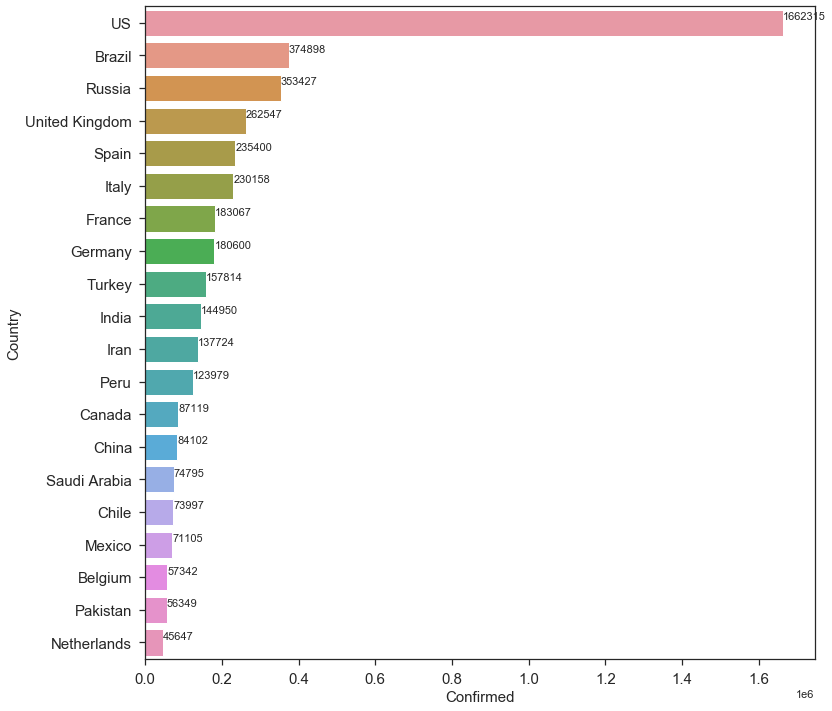

In [294]:
# Plot a horizontal barplot with the data frame
sns.set(rc={'figure.figsize':(12,12)}) # size up the bar plot 
sns.set_style("ticks") # set a style of seaborn plots
ax = sns.barplot(x='Confirmed', y='Country', data=df_cc, orient='h', saturation=0.7) # make a horizontal barplot using seaborn 
plt.xlabel("Confirmed", fontsize = 15) # adjust the fontsize of the x label
plt.ylabel("Country", fontsize = 15) # adjust the fontsize of the y label
plt.xticks(fontsize = 15) # adjust the fontsize of the x ticks
plt.yticks(fontsize = 15) # adjust the fontsize of the y ticks
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0)) # change the x tick format 
# to label the values at the end of each bar, using text function. 
for x in ax.patches:  
    ax.text(x.get_width(), x.get_y() + x.get_height()-0.5, # -0.5 is for adjusting the label position 
           int(x.get_width()), fontsize = 11)

## Part B: COVID-19 Study: Visualization using Matplotlib

In [295]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            3006 non-null   float64
 1   Admin2          3009 non-null   object 
 2   Province_State  3232 non-null   object 
 3   Country_Region  3410 non-null   object 
 4   Last_Update     3410 non-null   object 
 5   Lat             3341 non-null   float64
 6   Long_           3341 non-null   float64
 7   Confirmed       3410 non-null   int64  
 8   Deaths          3410 non-null   int64  
 9   Recovered       3410 non-null   int64  
 10  Active          3410 non-null   int64  
 11  Combined_Key    3410 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 319.8+ KB


In [296]:
# To extract the required columns, use groupby function to group the rows by countries in the Country_Region column
# and add up the rows by the corresponding countries in the Recovered column
g2 = df.groupby("Country_Region").Recovered.sum() 
g2

Country_Region
Afghanistan           1097
Albania                795
Algeria               4747
Andorra                663
Angola                  18
                      ... 
West Bank and Gaza     357
Western Sahara           6
Yemen                   10
Zambia                 336
Zimbabwe                25
Name: Recovered, Length: 188, dtype: int64

In [297]:
# merge the Confirmed column and Recovered column using "Country" column
g_df = pd.merge(g, g2, on = "Country_Region") 
g_df = g_df.reset_index() 
g_df.columns = ["Country", "Confirmed", "Recovered"]

In [298]:
g_df = g_df.sort_values(by="Confirmed", ascending=False).head(5) # sort the data frame by Confirmed in descending order and take the only top 5 rows 
g_df = g_df.reset_index(drop=True) # reset the index dropping the existing index
g_df

,Country,Confirmed,Recovered
0,US,1662315,379157
1,Brazil,374898,153833
2,Russia,353427,118798
3,United Kingdom,262547,1161
4,Spain,235400,150376


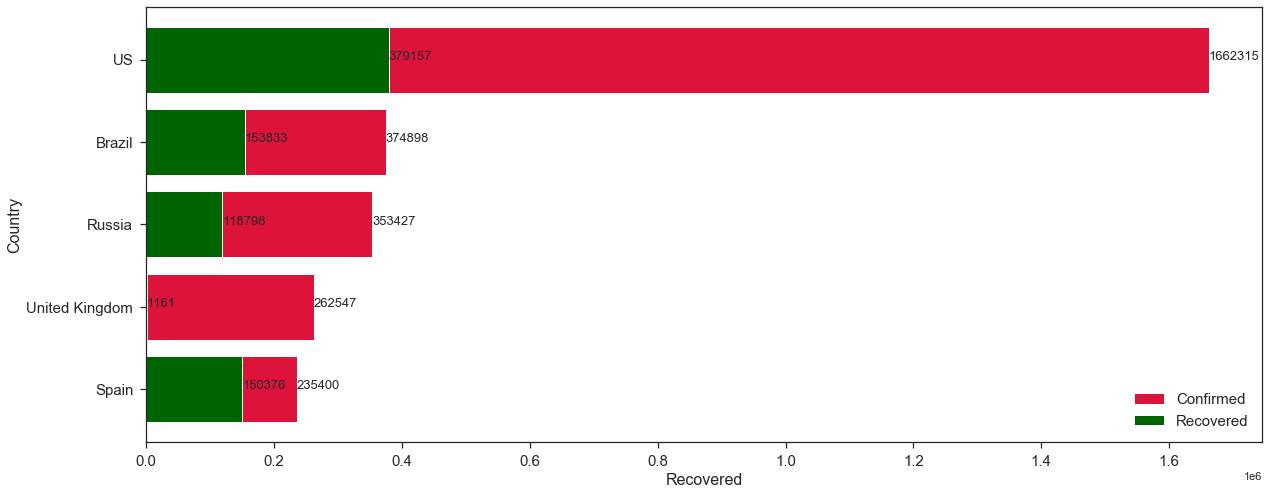

In [299]:
fig = plt.figure(figsize=(20,8)) # adjust the figure size so that the bars are well fitted and readable
ax1 = fig.add_subplot(111) # choose the 1st subplot in 1x1 grid

# plot the horizontal stacked barplot on the chosen subplot
p1 = ax1.barh(g_df["Country"], g_df["Confirmed"],color='crimson') # values for "Confirmed" are located at the top of the bars
p2 = ax1.barh(g_df["Country"], g_df["Recovered"],color='darkgreen') # values for "Recovered" are located at the bottom
plt.gca().invert_yaxis() # invert the y-axis 
ax1.set_xlabel("Recovered", fontsize = 16) # set the x label and its font-size
ax1.set_ylabel("Country", fontsize = 16) # set the y label and its font-size
plt.xticks(fontsize = 15) # set the xticks font-size 
plt.yticks(fontsize = 15) # set the yticks font-size
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0)) # reset the style of x-ticks label

# label the values on the bars 
for p in ax1.patches:  
    ax1.text(p.get_width(), p.get_y() + p.get_height()-0.4, 
           int(p.get_width()), fontsize = 13)
# display the legend 
plt.legend((p1[0],p2[0]), ("Confirmed","Recovered"), fontsize = 15)    
plt.show()